<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/TCC_Queimadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Fundamentos de Machine Learning Aplicado II (Turma 02)</center>

<center>

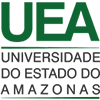

</center>

---
## <center>Atividade Final</center>
##### <center>Professor: Juan Gabriel Colona</center>
###### <center>Aluno: Daniel Erasmo Leite Soares</center>


---



## **<center>Análise histórica e clusterização de focos de Queimadas nos Biomas Brasileiros** </center>

### **<center>Dados Coletados e Geridos pelo INPE.** </center>

<center>O monitoramento de queimadas e incêndios florestais em imagens de satélites é particularmente útil para regiões remotas sem meios intensivos e locais de acompanhamento, condição esta que representa a situação geral do País. Para uma área com torres de observação guarnecidas continuamente e mantendo comunicação direta com brigadas de combate de fogo, os dados de satélite têm interesse marginal. 
A detecção dos focos de queima de vegetação nas imagens utiliza um mesmo modo de identificação de fogo, em todas regiões, todos os dias e por anos seguidos, o que permite análises temporais e espaciais da ocorrência do fogo que seriam impossíveis de outra forma, dada a precariedade, descontinuidade e diferença de métodos nas fontes de informação locais.  Em particular, os dados do "satélite de referência" permitem a comparação entre qualquer país do Planeta.</center>



[Dados disponíveis aqui.](https://queimadas.dgi.inpe.br/queimadas/bdqueimadas)




## <center>Os dados são coletados por uma constelação de satélites.</center>

[Representação artística em tempo real](http://stuffin.space/)


## **<center>Os Biomas Brasileiros** </center>


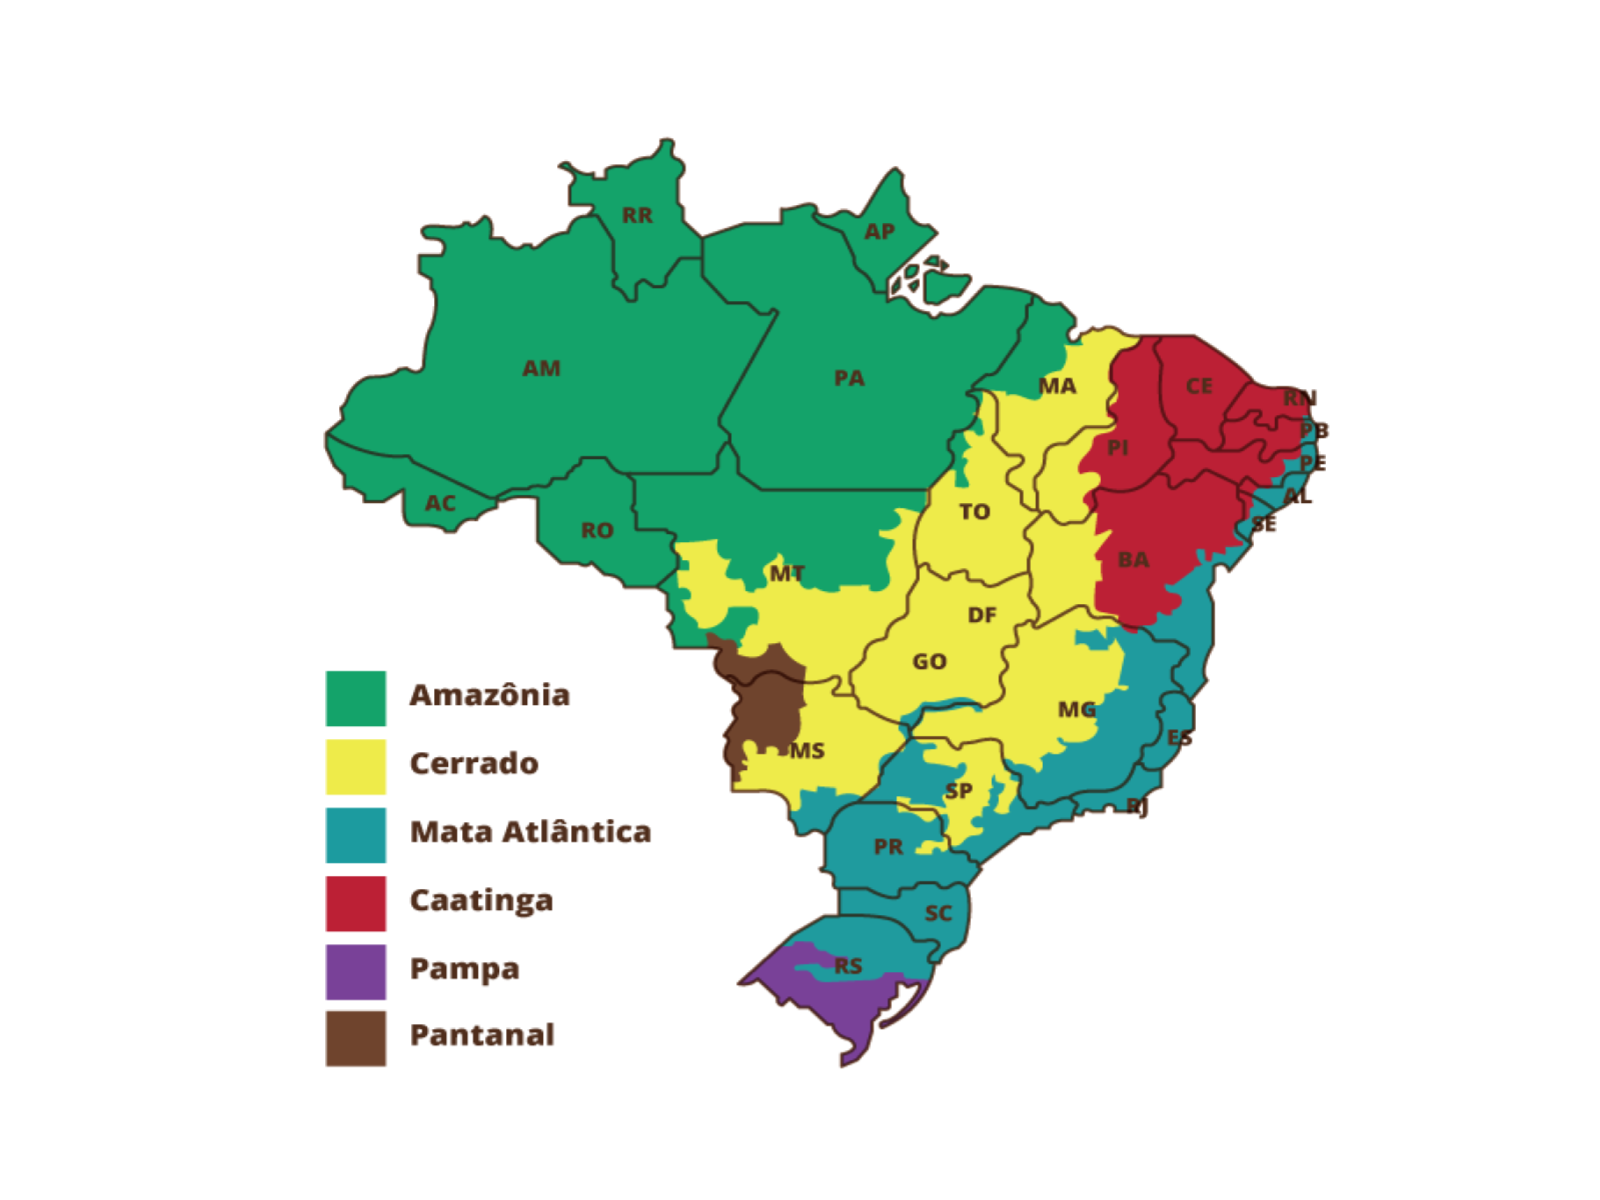



## Preparação do Ambiente

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

     |████████████████████████████████| 1.0 MB 25.6 MB/s 
     |████████████████████████████████| 16.7 MB 321 kB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
     |████████████████████████████████| 19.3 MB 5.5 MB/s 
     |████████████████████████████████| 162 kB 17.9 MB/s 
     |████████████████████████████████| 47 kB 3.3 MB/s 
     |████████████████████████████████| 1.0 MB 59.0 MB/s 
     |████████████████████████████████| 2.3 MB 57.9 MB/s 
     |████████████████████████████████| 51 kB 232 kB/s 
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 144 kB 51.6 MB/s 
     |████████████████████████████████| 5.8 MB 55.3 MB/s 
     |████████████████████████████████| 251 kB 69.1 MB/s 
     |████████████████████████████████| 127 kB 60.3 MB/s 
  Created wheel for biokit: filename=biokit-0.5.0-py3-none-any.whl size=177148 sha256=6aa16c81a4336c341f3be8172d9658a2cea306a3bc9b41883cfc58bb60c0d644
  Stored in directory: /root/.cache/pip/whe

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [3]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Criando os DataFrames de focos de queimadas do Brasil
''' Antigos
biomas_1617 = pd.read_csv('/content/drive/MyDrive/TCC2/dataset/Focos_biomas_2016-08-28_2017-08-27.csv')
biomas_1718 = pd.read_csv('/content/drive/MyDrive/TCC2/dataset/Focos_biomas_2017-08-28_2018-08-27.csv')
biomas_1819 = pd.read_csv('/content/drive/MyDrive/TCC2/dataset/Focos_biomas_2018-08-28_2019-08-27.csv')
biomas_1920 = pd.read_csv('/content/drive/MyDrive/TCC2/dataset/Focos_biomas_2019-08-28_2020-08-27.csv')
biomas_2021 = pd.read_csv('/content/drive/MyDrive/TCC2/dataset/Focos_biomas_2020-08-28_2021-08-27.csv')
#biomas_focos = [biomas_1920, biomas_2021]
'''
# Novos

alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2019-01-01_2019-12-31.csv')
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/novos/Focos_2021-01-01_2021-12-31.csv')
alertas = [alertas_2019, alertas_2020, alertas_2021]

alertas_1921 = pd.concat(alertas)

In [6]:
alertas_1921

datahora  satelite    pais       estado  \
0       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
1       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
2       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
3       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
4       2019/10/27 17:05:00  AQUA_M-T  Brasil     AMAZONAS   
...                     ...       ...     ...          ...   
184076  2021/08/29 17:05:00  AQUA_M-T  Brasil    TOCANTINS   
184077  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184078  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184079  2021/08/29 17:07:00  AQUA_M-T  Brasil         PARA   
184080  2021/08/29 17:02:00  AQUA_M-T  Brasil        GOIAS   

                   municipio     bioma  diasemchuva  precipitacao  riscofogo  \
0                     PACAJA  Amazonia          2.0           1.6        0.5   
1                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
2                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
3                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
4       NOVA OLINDA DO NORTE  Amazonia          0.0           0.3        0.0   
...                      ...       ...          ...           ...        ...   
184076     LAGOA DA CONFUSAO   Cerrado         88.0           0.0        1.0   
184077    NOVO SANTO ANTONIO   Cerrado        104.0           0.0        1.0   
184078    NOVO SANTO ANTONIO   Cerrado        103.0           0.0        1.0   
184079                PACAJA  Amazonia          2.0           0.0        0.5   
184080       MIMOSO DE GOIAS   Cerrado         37.0           0.0        1.0   

        latitude  longitude    frp  
0       -3.60200  -49.96300  201.6  
1       -3.63000  -52.25500   47.5  
2       -3.63100  -52.26400   17.4  
3       -3.64200  -52.26500   12.4  
4       -3.65100  -58.25400   12.1  
...          ...        ...    ...  
184076 -10.87773  -50.33506  246.6  
184077 -12.37030  -51.13305   10.4  
184078 -12.34445  -51.14636  150.6  
184079  -4.08141  -50.88046   19.3  
184080 -14.97406  -48.20551   28.5  

[604510 rows x 12 columns]

In [8]:
geometry = [Point(xy) for xy in zip(alertas_1921['longitude'], alertas_1921['latitude'])]

In [10]:
alertas_1921 = gpd.GeoDataFrame(alertas_1921, crs='EPSG:4326', geometry=geometry)

In [11]:
alertas_1921

datahora  satelite    pais       estado  \
0       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
1       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
2       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
3       2019/10/27 17:05:00  AQUA_M-T  Brasil         PARA   
4       2019/10/27 17:05:00  AQUA_M-T  Brasil     AMAZONAS   
...                     ...       ...     ...          ...   
184076  2021/08/29 17:05:00  AQUA_M-T  Brasil    TOCANTINS   
184077  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184078  2021/08/29 17:05:00  AQUA_M-T  Brasil  MATO GROSSO   
184079  2021/08/29 17:07:00  AQUA_M-T  Brasil         PARA   
184080  2021/08/29 17:02:00  AQUA_M-T  Brasil        GOIAS   

                   municipio     bioma  diasemchuva  precipitacao  riscofogo  \
0                     PACAJA  Amazonia          2.0           1.6        0.5   
1                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
2                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
3                   ALTAMIRA  Amazonia          0.0           0.5        0.2   
4       NOVA OLINDA DO NORTE  Amazonia          0.0           0.3        0.0   
...                      ...       ...          ...           ...        ...   
184076     LAGOA DA CONFUSAO   Cerrado         88.0           0.0        1.0   
184077    NOVO SANTO ANTONIO   Cerrado        104.0           0.0        1.0   
184078    NOVO SANTO ANTONIO   Cerrado        103.0           0.0        1.0   
184079                PACAJA  Amazonia          2.0           0.0        0.5   
184080       MIMOSO DE GOIAS   Cerrado         37.0           0.0        1.0   

        latitude  longitude    frp                     geometry  
0       -3.60200  -49.96300  201.6   POINT (-49.96300 -3.60200)  
1       -3.63000  -52.25500   47.5   POINT (-52.25500 -3.63000)  
2       -3.63100  -52.26400   17.4   POINT (-52.26400 -3.63100)  
3       -3.64200  -52.26500   12.4   POINT (-52.26500 -3.64200)  
4       -3.65100  -58.25400   12.1   POINT (-58.25400 -3.65100)  
...          ...        ...    ...                          ...  
184076 -10.87773  -50.33506  246.6  POINT (-50.33506 -10.87773)  
184077 -12.37030  -51.13305   10.4  POINT (-51.13305 -12.37030)  
184078 -12.34445  -51.14636  150.6  POINT (-51.14636 -12.34445)  
184079  -4.08141  -50.88046   19.3   POINT (-50.88046 -4.08141)  
184080 -14.97406  -48.20551   28.5  POINT (-48.20551 -14.97406)  

[604510 rows x 13 columns]

In [12]:
type(alertas_1921)

geopandas.geodataframe.GeoDataFrame

In [13]:
alertas_1921 = alertas_1921.to_crs(crs='EPSG:3857')

In [14]:
alertas_1921.crs.to_string()

'EPSG:3857'

In [15]:
alertas_1921['bioma'].unique()

array(['Amazonia', 'Pantanal', 'Cerrado', 'Caatinga', 'Mata Atlantica',
       'Pampa'], dtype=object)

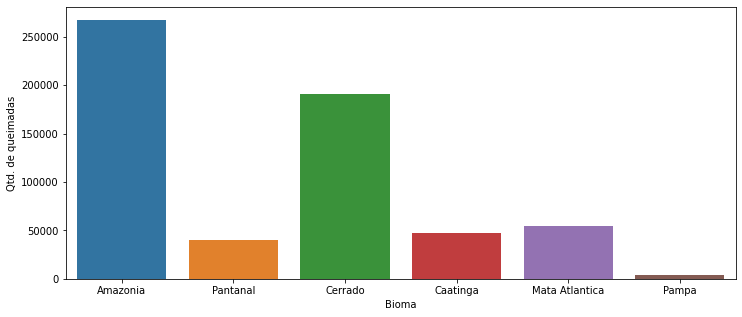

In [16]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='bioma', data=alertas_1921)
ax.set_xlabel('Bioma')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

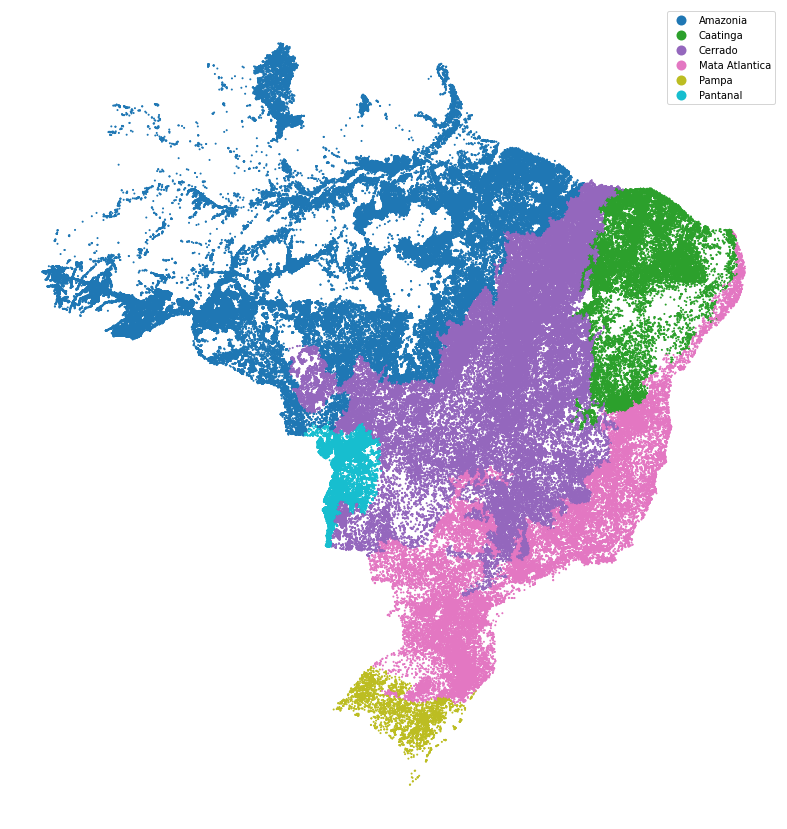

In [17]:
ax = alertas_1921.plot(figsize=(20, 15), column='bioma', markersize=1, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## Carregamento e preparação do DataFrame do Bioma Amazônia

---



In [ ]:
# Criando os DataFrame a ser usado na análise.
#Focos_amazonia_1617 = pd.read_csv('/content/drive/MyDrive/ML2/Focos_amazonia_2016-08-28_2017-08-27.csv')
#Focos_amazonia_1718 = pd.read_csv('/content/drive/MyDrive/ML2/Focos_amazonia_2017-08-28_2018-08-27.csv')
#Focos_amazonia_1819 = pd.read_csv('/content/drive/MyDrive/ML2/Focos_amazonia_2018-08-28_2019-08-27.csv')
Focos_amazonia_1920 = pd.read_csv('/content/drive/MyDrive/Módulos/ML2/Focos_amazonia_2019-08-28_2020-08-27.csv')
Focos_amazonia_2021 = pd.read_csv('/content/drive/MyDrive/Módulos/ML2/Focos_amazonia_2020-08-28_2021-08-27.csv')

#amazonia_focos = [Focos_amazonia_1617, Focos_amazonia_1718, Focos_amazonia_1819, Focos_amazonia_1920, Focos_amazonia_2021]
amazonia_focos = [Focos_amazonia_1920, Focos_amazonia_2021]
amazonia_1621 = pd.concat(amazonia_focos)

In [ ]:
amazonia_1621

datahora  satelite    pais    estado            municipio  \
0       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA              PRAINHA   
1       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA               JURUTI   
2       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA             SANTAREM   
3       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA     MOJUI DOS CAMPOS   
4       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA     MOJUI DOS CAMPOS   
...                     ...       ...     ...       ...                  ...   
101051  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA   SAO FELIX DO XINGU   
101052  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA             ALMEIRIM   
101053  2020/09/27 17:05:00  AQUA_M-T  Brasil  RONDONIA   MACHADINHO D'OESTE   
101054  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA  SANTANA DO ARAGUAIA   
101055  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA  SANTANA DO ARAGUAIA   

           bioma  diasemchuva  precipitacao  riscofogo  latitude  longitude  \
0       Amazonia          2.0           3.6        0.2    -2.129    -53.593   
1       Amazonia          3.0           1.2        0.1    -2.448    -56.025   
2       Amazonia          4.0           0.4        0.3    -2.545    -54.834   
3       Amazonia          6.0           0.0        0.4    -2.659    -54.727   
4       Amazonia          3.0           0.1        0.5    -2.826    -54.608   
...          ...          ...           ...        ...       ...        ...   
101051  Amazonia          0.0           0.7        0.9    -5.461    -51.190   
101052  Amazonia         14.0           4.3        0.1    -0.808    -52.692   
101053  Amazonia          2.0           0.0        0.5    -9.007    -61.610   
101054  Amazonia          0.0           0.1        0.3    -9.008    -50.890   
101055  Amazonia          0.0           0.2        0.3    -9.009    -50.899   

          frp  
0        12.2  
1        14.9  
2         4.8  
3        10.6  
4        26.6  
...       ...  
101051   10.0  
101052   10.2  
101053  538.9  
101054   19.8  
101055    9.1  

[187003 rows x 12 columns]

In [ ]:
geometry = [Point(xy) for xy in zip(amazonia_1621['longitude'], amazonia_1621['latitude'])]

In [ ]:
amazonia_1621 = gpd.GeoDataFrame(amazonia_1621, crs='EPSG:4326', geometry=geometry)

In [ ]:
amazonia_1621

datahora  satelite    pais    estado            municipio  \
0       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA              PRAINHA   
1       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA               JURUTI   
2       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA             SANTAREM   
3       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA     MOJUI DOS CAMPOS   
4       2019/12/21 17:10:00  AQUA_M-T  Brasil      PARA     MOJUI DOS CAMPOS   
...                     ...       ...     ...       ...                  ...   
101051  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA   SAO FELIX DO XINGU   
101052  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA             ALMEIRIM   
101053  2020/09/27 17:05:00  AQUA_M-T  Brasil  RONDONIA   MACHADINHO D'OESTE   
101054  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA  SANTANA DO ARAGUAIA   
101055  2020/09/27 17:05:00  AQUA_M-T  Brasil      PARA  SANTANA DO ARAGUAIA   

           bioma  diasemchuva  precipitacao  riscofogo  latitude  longitude  \
0       Amazonia          2.0           3.6        0.2    -2.129    -53.593   
1       Amazonia          3.0           1.2        0.1    -2.448    -56.025   
2       Amazonia          4.0           0.4        0.3    -2.545    -54.834   
3       Amazonia          6.0           0.0        0.4    -2.659    -54.727   
4       Amazonia          3.0           0.1        0.5    -2.826    -54.608   
...          ...          ...           ...        ...       ...        ...   
101051  Amazonia          0.0           0.7        0.9    -5.461    -51.190   
101052  Amazonia         14.0           4.3        0.1    -0.808    -52.692   
101053  Amazonia          2.0           0.0        0.5    -9.007    -61.610   
101054  Amazonia          0.0           0.1        0.3    -9.008    -50.890   
101055  Amazonia          0.0           0.2        0.3    -9.009    -50.899   

          frp                    geometry  
0        12.2  POINT (-53.59300 -2.12900)  
1        14.9  POINT (-56.02500 -2.44800)  
2         4.8  POINT (-54.83400 -2.54500)  
3        10.6  POINT (-54.72700 -2.65900)  
4        26.6  POINT (-54.60800 -2.82600)  
...       ...                         ...  
101051   10.0  POINT (-51.19000 -5.46100)  
101052   10.2  POINT (-52.69200 -0.80800)  
101053  538.9  POINT (-61.61000 -9.00700)  
101054   19.8  POINT (-50.89000 -9.00800)  
101055    9.1  POINT (-50.89900 -9.00900)  

[187003 rows x 13 columns]

In [ ]:
type(amazonia_1621)

geopandas.geodataframe.GeoDataFrame

In [ ]:
amazonia_1621 = amazonia_1621.to_crs(crs='EPSG:3857')

In [ ]:
amazonia_1621.crs.to_string()

'EPSG:3857'

In [ ]:
amazonia_1621['estado'].unique()

array(['PARA', 'MATO GROSSO', 'AMAZONAS', 'RORAIMA', 'MARANHAO',
       'RONDONIA', 'TOCANTINS', 'AMAPA', 'ACRE'], dtype=object)

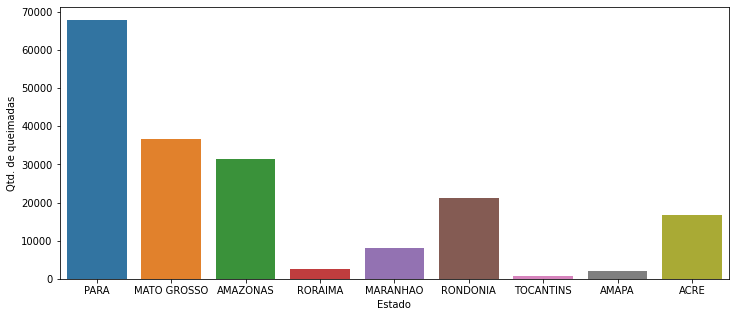

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=amazonia_1621)
ax.set_xlabel('Estado')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

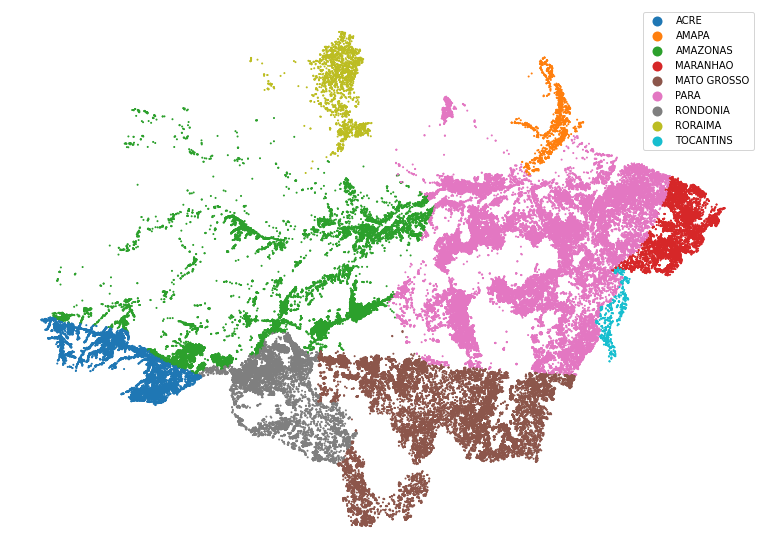

In [ ]:
ax = amazonia_1621.plot(figsize=(15, 10), column='estado', markersize=1, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## **Aplicação do Algoritmos para o Bioma Amazônia**


*   K-Means
*   DBSCAN

**K-Means Para o Bioma Amazônia**

In [ ]:
coord_amazonia = amazonia_1621.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [ ]:
agrupadorK = KMeans(n_clusters=9)

In [ ]:
agrupadorK.fit(coord_amazonia)

KMeans(n_clusters=9)

In [ ]:
np.unique(agrupadorK.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [ ]:
coord_amazonia['Grupo'] = agrupadorK.labels_

In [ ]:
coord_amazonia.head(30)

latitude  longitude  Grupo
0     -2.129    -53.593      1
1     -2.448    -56.025      1
2     -2.545    -54.834      1
3     -2.659    -54.727      1
4     -2.826    -54.608      1
5     -2.827    -54.617      1
6     -2.859    -54.459      1
7     -2.989    -52.930      1
8     -3.088    -54.906      1
9     -3.090    -54.915      1
10    -3.113    -54.753      1
11    -3.290    -47.604      8
12    -1.925    -54.550      1
13    -4.148    -55.367      1
14    -4.159    -55.445      1
15    -4.161    -55.455      1
16    -4.167    -55.635      7
17    -4.176    -55.044      1
18    -4.177    -55.054      1
19    -4.183    -55.366      1
20    -4.204    -54.862      1
21    -4.212    -55.302      1
22    -4.242    -55.204      1
23    -4.266    -55.614      7
24    -4.304    -50.546      4
25    -4.339    -55.825      7
26    -0.493    -48.535      8
27     1.963    -55.788      1
28   -14.568    -56.915      0
29   -16.084    -59.967      0

**Gráfico com agrupamento por Cluster**

In [ ]:
c0lat = coord_amazonia[coord_amazonia['Grupo']==0]['latitude']
c0lon = coord_amazonia[coord_amazonia['Grupo']==0]['longitude']
c1lat = coord_amazonia[coord_amazonia['Grupo']==1]['latitude']
c1lon = coord_amazonia[coord_amazonia['Grupo']==1]['longitude']
c2lat = coord_amazonia[coord_amazonia['Grupo']==2]['latitude']
c2lon = coord_amazonia[coord_amazonia['Grupo']==2]['longitude']
c3lat = coord_amazonia[coord_amazonia['Grupo']==3]['latitude']
c3lon = coord_amazonia[coord_amazonia['Grupo']==3]['longitude']
c4lat = coord_amazonia[coord_amazonia['Grupo']==4]['latitude']
c4lon = coord_amazonia[coord_amazonia['Grupo']==4]['longitude']
c5lat = coord_amazonia[coord_amazonia['Grupo']==5]['latitude']
c5lon = coord_amazonia[coord_amazonia['Grupo']==5]['longitude']
c6lat = coord_amazonia[coord_amazonia['Grupo']==6]['latitude']
c6lon = coord_amazonia[coord_amazonia['Grupo']==6]['longitude']
c7lat = coord_amazonia[coord_amazonia['Grupo']==7]['latitude']
c7lon = coord_amazonia[coord_amazonia['Grupo']==7]['longitude']
c8lat = coord_amazonia[coord_amazonia['Grupo']==8]['latitude']
c8lon = coord_amazonia[coord_amazonia['Grupo']==8]['longitude']

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=False,
)

fig.show()

**DBSCAN para o Bioma Amazônia**

In [ ]:
agrupadorDB = DBSCAN(eps = 1.31, min_samples = 15, metric='manhattan')
agrupadorDB.fit(coord_amazonia)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

In [ ]:
np.unique(agrupadorDB.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = coord_amazonia['latitude'], y = coord_amazonia['longitude'],
                         mode = 'markers',
                         marker = dict(color = agrupadorDB.labels_.astype(np.float)),
                         text = agrupadorDB.labels_))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

